In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Часть первая

## Задачи 1, 2 (про судебный процесс)

### Условие

1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

   Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?


### Решение

событие D (от англ. defendant) - у подсудимого оказалась редкая группа крови
событие G (от англ. guilty) - подсудимый виновен в убийстве <=> подсудимый и убийца один и тот же человек

Все расчёты веростностей происходят при условии события M (от англ. murderer) - убийца обладает редкой группой крови

И адвокат и прокурор должны были оценить веростность:

$ P(G | D) - ? $ (вероятность вины подсудимого при условии, что у него редкая группа крови)

Согласно теореме Байеса и определению полной вероятности ($\backsim$ - знак отрицания): 

$\Large P(G | D) = \frac{P(D|G) * P(G)}{P(D)} = \frac{P(D|G) * P(G)}{P(D|G) * P(G) + P(D|\backsim G) * P(\backsim G)} = $
$\Large \frac{P(D|G) * P(G)}{P(D|G) * P(G) + P(D|\backsim G) * (1 - P(G))} = $
$\Large \frac{P(D|G) * P(G)}{  (P(D|G) - P(D|\backsim G)) * P(G) + P(D| \backsim G)}$

Зная, что 

$ P(D | G) = 1 $

$ P(D| \backsim G) \simeq  0.01 $ (по оценке прокурора)

Получаем функцию от априорной вероятности:

$\Large P(G | D) = \frac{P(G)}{0.99 * P(G) + 0.01}$

То, насколько, группа крови является свидетельством в пользу вины подсудимого зависит от априорной оценки вероятности его вины

**Прокурор оценил:** 

$ P(D | \backsim G) = 1 \% $ и сказал, что это является вероятностью невиновности, а следовательно - $ P(G | D) = 99 \% $. Ошибка прокурора в том, что на самом деле $ P(D | \backsim G)  \neq P(\backsim G | D) $. 

Мелкая ошибка, прокурора состояла в том, что 

$ P(D | \backsim G) = \frac{\text{Число_невиновных_с_редкой_группой_крови}}{\text{Общее_число_невиновных}} = \frac{\text{9_999}}{\text{999_999}}$


**Адвокат оценил:** 
Пусть событие R - (random) - событие наличия редкой группы крови у случайного человека из города 

$ P(G | R) = \frac{1}{10000}$ и сказал, что  $ P(G | R) = P(G | D) $. Это неверно, в том случае, если подсудимый был выбран неслучайным образом из множества людей с редкой группой крови и против него имеются другие улики, которые увеличивают оценку априорной вероятности его вины

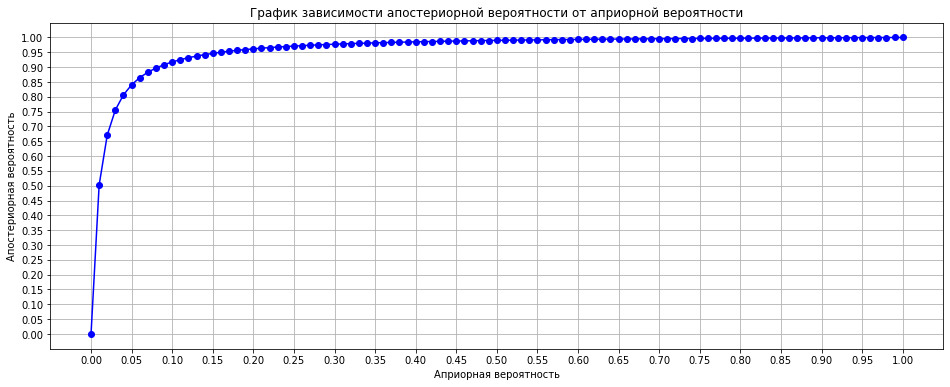

In [2]:
from fractions import Fraction
def prob_func(p_g):
    p_d_g = 1
    # p_d_ng = Fraction(10_000, 1_000_000) # приблизительный подсчёт вероятности p_d_ng прокурором
    p_d_ng = Fraction(9_999, 999_999) # математически точный подсчёт вероятности p_d_ng 
                                      # делим число невиновных с редкой группой крови на число всех невиновных в городе
    
    nominator = p_d_g * p_g
    denominator = (p_d_g - p_d_ng) * p_g + p_d_ng
    
    return float(Fraction(nominator, denominator))


number_of_bins = 100

x = np.linspace(0, number_of_bins, number_of_bins + 1)

plt.figure(figsize=(16, 6))
plt.plot(x / number_of_bins, [prob_func(Fraction(int(i), number_of_bins)) for i in x], color='blue', marker='o')
plt.grid(True)
plt.gca().set_yticks(np.linspace(0, 1, 21));
plt.gca().set_xticks(np.linspace(0, 1, 21));
plt.xlabel("Априорная вероятность")
plt.ylabel("Апостериорная вероятность")
plt.title("График зависимости апостериорной вероятности от априорной вероятности")
# plt.xlim((0, 0.05))
plt.show()

In [3]:
# для случайного человека из 1_000_000 людей вероятность быть виновным при условии наличия редкой группы крови
# составляет 1 / 10_000
prob_func(Fraction(1, 1_000_000))

0.0001

## Задача 3

### Условие

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.


Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).


Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


### Решение

событие S - (от англ. Sick) - человек болен
событие P - (от англ. Positive) - тест показал болезнь

$ P(S) = 1 \% $

$ P(\backsim P | S) = 5 \% $ (conditional false negative probability)


$ P(P | \backsim S) = 5 \% $ (conditional false positive probatility)

Следовательно:

$ P(P|S) = 1 - P(\backsim P | S) = 95 \% $ (conditional true positive probability)

$ P(\backsim P|\backsim S) = 1 - P(P |\backsim  S) = 95 \% $ (conditional true negative probability) 

$\Large P(S| P) = \frac{P(P | S) * P(S)}{P(P)} = \frac{P(P | S) * P(S)}{P(P|S) * P(S) + P(P|\backsim S) * P(\backsim S)}=\frac{0.95 * 0.01}{0.95 * 0.01 + 0.05 * 0.99}$ 

In [4]:
print("Апостериорная вероятность оказаться больным: ", (0.95 * 0.01) / (0.95 * 0.01 + 0.05* 0.99))

Апостериорная вероятность оказаться больным:  0.16101694915254236


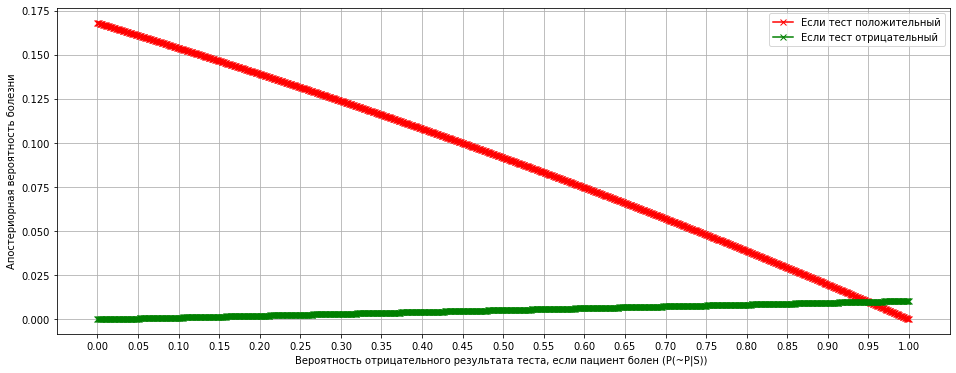

Вывод: при уменьшении false negative на больных пациентах 
        мы получим лишь небольшое увеличение апостериорной вероятности болезни


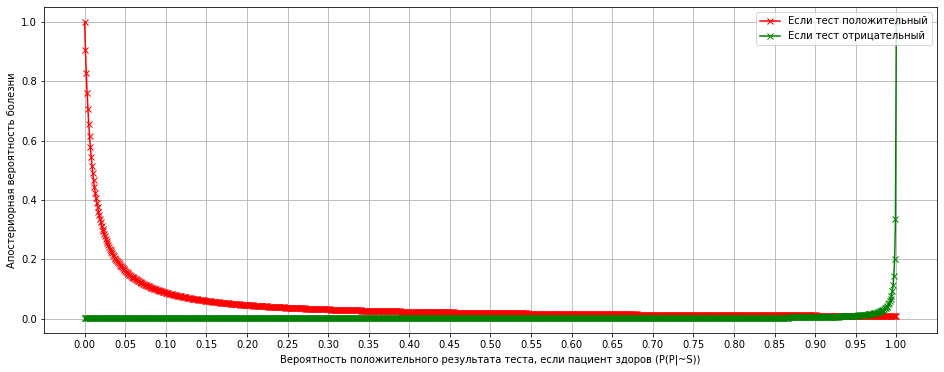

Вывод: Если уменьшить вероятность получения положительного теста на здоровых людях, то 
апостериорная вероятность болезни при получении положительного теста существенно увеличится


In [5]:
class Medical_test:
    def initial_cond(self):
        self.s = 0.01
        self.np_s = 0.05
        self.p_ns = 0.05
    
    def from_condition(self):
        self.p_s = 1 - self.np_s
        self.np_ns = 1 - self.p_ns
        
    def bayes_formula(self):
        s_p = self.p_s * self.s / (self.p_s * self.s + self.p_ns * (1 - self.s))
        s_np = self.np_s * self.s / (self.np_s * self.s + self.np_ns * (1 - self.s))
        return s_p, s_np
    
    def from_false_negative(self, np_s):
        self.initial_cond()
        self.np_s = np_s
        self.from_condition()
        return self.bayes_formula()
    
    def from_false_positive(self, p_ns):
        self.initial_cond()
        self.p_ns = p_ns
        self.from_condition()
        return self.bayes_formula()

s1 = Medical_test()


show_until = 1

plt.figure(figsize=(16, 6))
x = np.linspace(0, show_until, 1001)
plt.plot(x, [s1.from_false_negative(i)[0] for i in x], label='Если тест положительный', 
                     color='red', marker='x')
plt.plot(x, [s1.from_false_negative(i)[1] for i in x], label='Если тест отрицательный', 
                     color='green', marker='x')
plt.gca().set_xticks(np.linspace(0, show_until, 21))
plt.grid(True)
plt.legend(loc='upper right')
plt.ylabel("Апостериорная вероятность болезни")

plt.xlabel("Вероятность отрицательного результата теста, если пациент болен (P(~P|S)) ");
plt.show()
print("""Вывод: при уменьшении false negative на больных пациентах 
        мы получим лишь небольшое увеличение апостериорной вероятности болезни""")

s1 = Medical_test()

plt.figure(figsize=(16, 6))
x = np.linspace(0, show_until, 1001)
plt.plot(x, [s1.from_false_positive(i)[0] for i in x], label='Если тест положительный', 
                     color='red', marker='x')
plt.plot(x, [s1.from_false_positive(i)[1] for i in x], label='Если тест отрицательный', 
                     color='green', marker='x')
plt.gca().set_xticks(np.linspace(0, show_until, 21))
plt.grid(True)
plt.legend(loc='upper right')
plt.ylabel("Апостериорная вероятность болезни")

plt.xlabel("Вероятность положительного результата теста, если пациент здоров (P(P|~S))");
plt.show()
print("""Вывод: Если уменьшить вероятность получения положительного теста на здоровых людях, то 
апостериорная вероятность болезни при получении положительного теста существенно увеличится""")

**Рекомендации врачам:** в первую очередь, уменьшать вероятность получения положительного теста на здоровых людях (false positive) т.к. это существнно больше повлияет на апостериорную вероятность болезни

# Часть вторая

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.ticker as ticker
from scipy.stats import multivariate_normal

In [17]:
# Загрузка данных
df = pd.read_csv("owid-covid-data.csv")

df = df.loc[df.location.str.contains("Russia")]
df.loc[:, 'new_cases'] = df.new_cases.fillna(0)
df.loc[:, 'date'] = df.date.astype("datetime64[ns]")

df = df.sort_values(by='date')

# возьмём первые 50 отсчётов(дней)
train_df = df.loc[df['date'] >= pd.to_datetime("2020-03-03")].head(50)
test_df = df.loc[(df['date'] >= pd.to_datetime("2020-03-03")) & (~df.date.isin(train_df.date))]

## Задание 2а. Построим линейную модель.

In [18]:
# обучение модели
train_df = train_df.set_index('date')[['total_cases', 'new_cases']]
total_cases = train_df.reset_index()[['total_cases']].apply(lambda x: np.log(x))

x = np.array(total_cases.index.tolist()).reshape(-1, 1)
y = np.array(total_cases.total_cases.tolist()).reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Уравнение предсказания:  $\Large \ln{y} = \alpha + \beta * x $

In [19]:
# Коэффициенты alpha и beta
print("alpha=", model.intercept_[0])
print("beta = ", model.coef_[0, 0])

alpha= 1.8207371487846977
beta =  0.19829091233588558


In [20]:
# оценим "шум" в данных на основе MLS - модели
sigma_noise = mean_squared_error(y, model.predict(x))
sigma_noise

0.12183046154391232

## Задание 2b. Найдем апостериорное распределение параметров модели

In [21]:
# возьмём начальные mu и sigma - коэффициенты 
init_alpha = 0
init_beta = 0

# возьмём распределение параметров с большим "разбросом"
width_of_multivariate_distribution = 1000_000 # дисперсия нормального расределения коэффициентов

cur_mu, cur_sigma = np.array([init_alpha, 
                              init_beta]),  width_of_multivariate_distribution * np.array([[1, 0], [0, 1]])

In [22]:
# обновим первоначальные значения MU и SIGMA на основе данных по total_cases 

def get_likelihood(px, py, sigma=.5):
    """генератор функции для расчёта правдоподопия для входного tuple(alpha, beta)"""
    return lambda x : np.exp(-(x[0] + x[1]*px - py) ** 2) / (2 * sigma * np.sqrt(2.*np.pi))


def bayesian_update(mu, sigma, x, y, sigma_noise):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, 
                     np.matmul(np.linalg.inv(sigma), 
                                 np.transpose(mu)
                              ) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), 
                                                                              np.array([y]) 
                                                                             ) 
                    )
    return mu_n, sigma_n

for px, py in list(zip(total_cases.index.tolist(), total_cases.total_cases)):
    cur_likelihood = get_likelihood(px, py)
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py, sigma_noise = sigma_noise)

In [23]:
# посмотрим значения
print(cur_mu)
print(cur_sigma)

[1.82073715 0.19829091]
[[ 1.15248900e-03 -3.49239090e-05]
 [-3.49239090e-05  1.42546568e-06]]


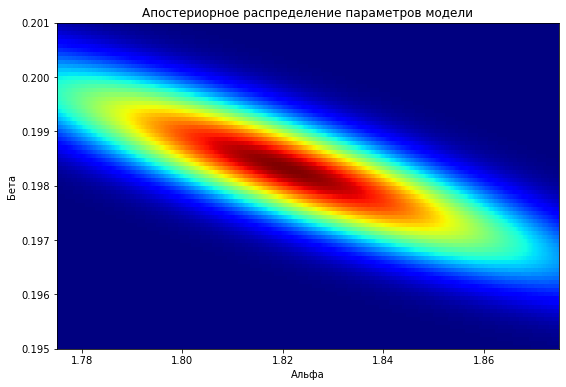

In [24]:
# построим график апостериорного распределения для параметров alpha и beta
N = 2_000


xs = np.linspace(-3, 3, N)
X = np.linspace(1.5, 2, N)
Y = np.linspace(0.1, 0.25, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

def myplot_heatmap(Z):
    # Make the plot
    # plt.axis('equal')
    plt.figure(figsize=(9, 6))
    
    plt.xlim((1.775, 1.875))
    plt.ylim((0.195, 0.201))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    # plt.scatter(true_mu[0], true_mu[1], marker='*', s=120)
    plt.xlabel('Альфа')
    plt.ylabel("Бета")
    plt.title("Апостериорное распределение параметров модели")


myplot_heatmap(Z)

## Задание 2с. Просэмплируем параметры из апостериорного распределения и построим графики

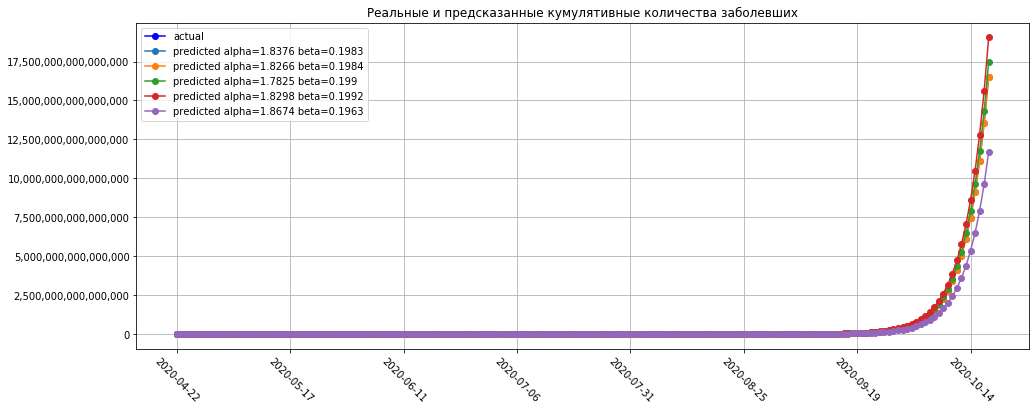

In [25]:
# сравним реальные и предсказанные случаи на графике
def model_predict(alpha, beta, x):
    return np.exp(alpha + beta * x)


fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(1, 1, 1)

total_cases.apply(lambda x: np.exp(x)).total_cases.plot(color='blue', 
                                                        figsize=(16, 6), 
                                                        grid=True, ax=ax,
                                                        marker='o', label='actual')

values_for_prediction = np.arange(0, 180, 1)
for i in range(5):
    alpha, beta = alpha, beta = multivariate_normal(mean=cur_mu, cov=cur_sigma, seed=160 + i).rvs()
    
    pd.DataFrame(model_predict(alpha=alpha,
                  beta=beta,
                  x=values_for_prediction.reshape(-1, 1)
                              ),
                 index=values_for_prediction,
                 columns=['total_cases'])['total_cases'].plot(kind='line',  ax=ax, 
                                               marker='o', label=f"""predicted alpha={round(alpha, 4)}"""
                                                              f""" beta={round(beta, 4)}""")

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, y: "{:,.0f}".format(x)))
plt.gca().set_xticklabels([pd.to_datetime(dte).strftime("%Y-%m-%d") for dte in 
                                   np.array(sorted(test_df.date.unique()))[
                                           [int(i) for i in plt.xticks()[0]]
                                   ]
                          ],
                         rotation=-45)
plt.legend(loc='upper left')
plt.title("Реальные и предсказанные кумулятивные количества заболевших")
plt.grid(True)
plt.show()

## Задание 3А (не закончено)

In [26]:
from scipy.special import erf

In [27]:
def gauss_integral(x, mu=0, sigma=1):
    return (1 + erf((x - mu) / (np.sqrt(2) * sigma)
                   )
           ) / 2

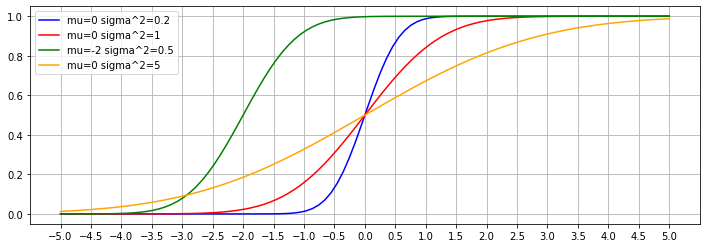

In [28]:
# гаусовы интегралы
plt.figure(figsize=(12, 4))
x = np.linspace(-5, 5, 100)
plt.plot(x, [gauss_integral(i, sigma=np.sqrt(0.2)) for i in x], label='mu=0 sigma^2=0.2', color='blue')
plt.plot(x, [gauss_integral(i) for i in x], label='mu=0 sigma^2=1', color='red')
plt.plot(x, [gauss_integral(i, mu=-2, sigma=np.sqrt(0.5)) for i in x], label='mu=-2 sigma^2=0.5', color='green')
plt.plot(x, [gauss_integral(i, mu=0, sigma=np.sqrt(5)) for i in x], label='mu=0 sigma^2=5', color='orange')

plt.xticks(np.arange(-5, 5.5, 0.5))
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [29]:
# возьмём начальные mu и sigma - коэффициенты 
init_alpha = 0
init_beta = 0

# возьмём распределение параметров с большим "разбросом"
width_of_multivariate_distribution = 1000_000 # дисперсия нормального расределения коэффициентов

cur_mu, cur_sigma = np.array([init_alpha, 
                              init_beta]),  width_of_multivariate_distribution * np.array([[1, 0], [0, 1]])

In [30]:
# обновим первоначальные значения MU и SIGMA на основе данных по total_cases 

def get_likelihood(px, py, sigma=.5):
    """генератор функции для расчёта правдоподопия для входного tuple(alpha, beta)"""
    return lambda x : np.exp(-(x[0] + x[1]*px - py) ** 2) / (2 * sigma * np.sqrt(2.*np.pi))


def bayesian_update(mu, sigma, x, y, sigma_noise):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, 
                     np.matmul(np.linalg.inv(sigma), 
                                 np.transpose(mu)
                              ) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), 
                                                                              np.array([y]) 
                                                                             ) 
                    )
    return mu_n, sigma_n

for px, py in list(zip(total_cases.index.tolist(), total_cases.total_cases)):
    cur_likelihood = get_likelihood(px, py)
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py, sigma_noise = sigma_noise)